In [55]:
import numpy as np
horizon = 2000
k = 4
explorationSteps = 1000
arm_1_values = np.random.normal(loc = 0.3 , scale =1 ,size = int(horizon/4))
arm_1_mean = arm_1_values.mean()
print(arm_1_mean)
arm_2_values = np.random.normal(loc = 0.5 , scale =1 ,size = int(horizon/4))
arm_2_mean = arm_2_values.mean()
print(arm_2_mean)
arm_3_values = np.random.normal(loc = 0.7 , scale =1 ,size = int(horizon/4))
arm_3_mean = arm_3_values.mean()
print(arm_3_mean)
arm_4_values = np.random.normal(loc = 0.8 , scale =1 ,size = int(horizon/4))
arm_4_mean = arm_4_values.mean()
print(arm_4_mean)

0.25900199094105153
0.5045235929917887
0.6916077101704992
0.8233263753753938


In [53]:
exploitation = horizon - explorationSteps

In [42]:
sampleMeans = [arm_1_mean,arm_2_mean,arm_3_mean,arm_4_mean]
xAxis = ['arm_1','arm_2','arm_3','arm_4']

Text(0, 0.5, 'sample means')

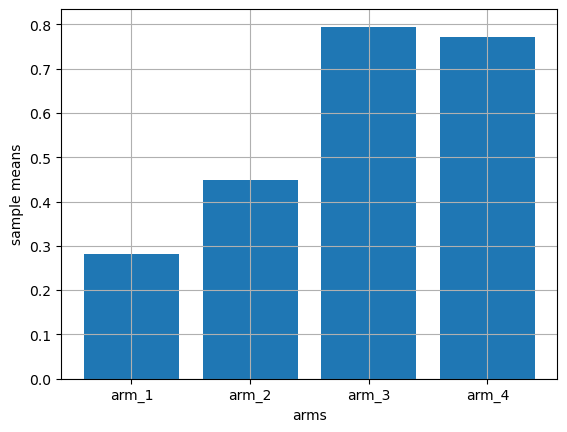

In [43]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.bar(xAxis,sampleMeans)
plt.xlabel('arms')
plt.ylabel('sample means')

In [44]:
bestArmMean = max(sampleMeans)

In [45]:
bestArmMean

0.7945351986539891

In [46]:
reward = arm_1_values.sum() + arm_2_values.sum()+ arm_3_values.sum() + arm_4_values.sum() + (exploitation*bestArmMean)

In [47]:
print(reward)

1368.6185869737574


In [48]:
optimalReward = 0.8*horizon
optimalReward

1600.0

In [49]:
regret = optimalReward - reward
regret

231.38141302624263

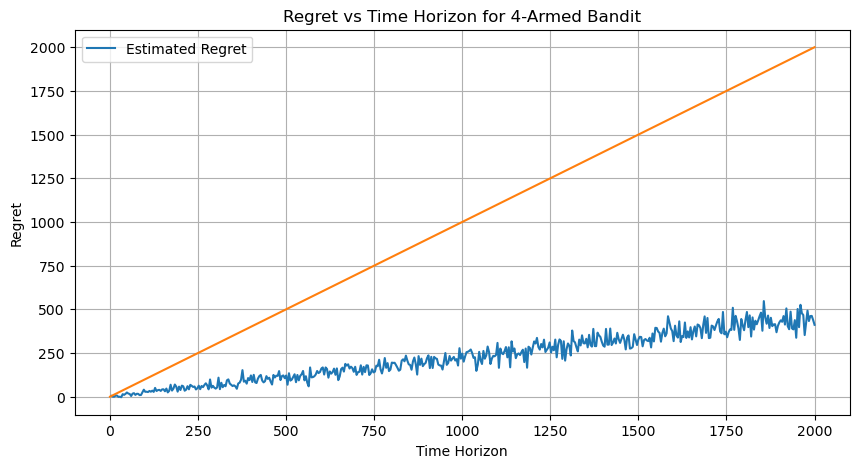

In [60]:
import numpy as np
import matplotlib.pyplot as plt

horizonRange = range(4, 2001, 4)
regretValues = []

for horizon in horizonRange:
    optimalReward = 0.8 * horizon  # best possible reward: always pulling arm with mean 0.8

    # Exploration: pull each arm horizon/4 times
    arm_1_values = np.random.normal(loc=0.3, scale=1, size=horizon // 4)
    arm_2_values = np.random.normal(loc=0.5, scale=1, size=horizon // 4)
    arm_3_values = np.random.normal(loc=0.7, scale=1, size=horizon // 4)
    arm_4_values = np.random.normal(loc=0.8, scale=1, size=horizon // 4)

    # Compute sample means from exploration phase
    sampleMeans = [
        arm_1_values.mean(),
        arm_2_values.mean(),
        arm_3_values.mean(),
        arm_4_values.mean()
    ]

    # Exploitation: pull the best arm for the remaining horizon
    bestArmMean = max(sampleMeans)
    exploitation = horizon - (4 * (horizon // 4))  # remaining steps after exploring all 4 arms equally
    reward = (
        arm_1_values.sum()
        + arm_2_values.sum()
        + arm_3_values.sum()
        + arm_4_values.sum()
        + exploitation * bestArmMean
    )

    regret = optimalReward - reward
    regretValues.append(regret)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(horizonRange, regretValues, label='Estimated Regret')
plt.plot([0,2000],[0,2000])
plt.xlabel('Time Horizon')
plt.ylabel('Regret')
plt.title('Regret vs Time Horizon for 4-Armed Bandit')
plt.grid(True)
plt.legend()
plt.show()
